In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.utils.testing import ignore_warnings

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
def warn(*args, **kwargs):
    pass
warnings.warn = warn

In [31]:
data = pd.read_csv('data.csv', index_col=0)

In [32]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


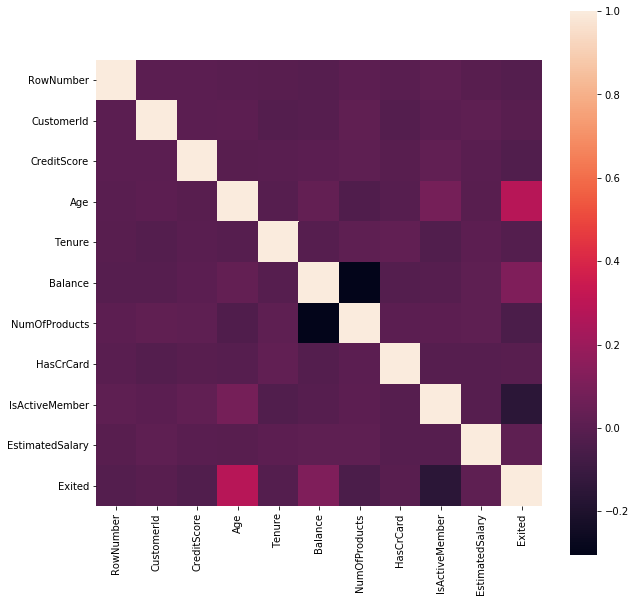

In [8]:
plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), square=True)
plt.show()

Text(0.5, 1.0, 'target')

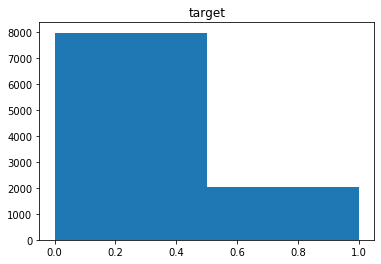

In [9]:
fig, axs = plt.subplots()
axs.hist(data['Exited'], bins=2)
axs.set_title('target')

In [11]:
data['Exited'].value_counts() #сколько клиентов ушло

0    7963
1    2037
Name: Exited, dtype: int64

In [12]:
# сколько мужчин
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [27]:
# самая многочисленная страна
data[data['Exited'] == 0]['Geography'].value_counts()

France     4204
Spain      2064
Germany    1695
Name: Geography, dtype: int64

In [23]:
# доля клиентов с нулевым балансом
total_balance = data['Balance'].count()
sim_balance = data[(data['Balance'] == 0) & (data['Exited'] == 0)].count()
x = sim_balance / total_balance
print(x)

RowNumber          0.3117
CustomerId         0.3117
Surname            0.3117
CreditScore        0.3117
Geography          0.3117
Gender             0.3117
Age                0.3117
Tenure             0.3117
Balance            0.3117
NumOfProducts      0.3117
HasCrCard          0.3117
IsActiveMember     0.3117
EstimatedSalary    0.3117
Exited             0.3117
dtype: float64


In [29]:
# data[(data['Balance'] == 0.00) & (data['Exited'] == 0)].count()
data[(data['Balance'] == 0.00)].count()

RowNumber          3617
CustomerId         3617
Surname            3617
CreditScore        3617
Geography          3617
Gender             3617
Age                3617
Tenure             3617
Balance            3617
NumOfProducts      3617
HasCrCard          3617
IsActiveMember     3617
EstimatedSalary    3617
Exited             3617
dtype: int64

In [33]:
def get_best_score(model):
    
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
    
    return

In [48]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

In [67]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object' and c!='Surname']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']

In [68]:
categorical_columns

['Geography', 'Gender']

In [42]:
X = data[numerical_columns].drop(['Exited', 'CustomerId'], axis=1)
y = data['Exited']

In [43]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88
2,608,41,1,83807.86,1,0,1,112542.58
3,502,42,8,159660.80,3,1,0,113931.57
4,699,39,1,0.00,2,0,0,93826.63
5,850,43,2,125510.82,1,1,1,79084.10


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [46]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

y_test_predict = lr.predict(X_test)

In [49]:
print('Accuracy:', accuracy_score(y_test, y_test_predict))
print('ROC-AUC :', roc_auc_score(y_test, y_test_predict))
print('f1_score:', f1_score(y_test, y_test_predict))

Accuracy: 0.8006666666666666
ROC-AUC : 0.5282647645831442
f1_score: 0.13832853025936598


In [50]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

y_test_predict = rfc.predict(X_test)

In [51]:
print('Accuracy:', accuracy_score(y_test, y_test_predict))
print('ROC-AUC :', roc_auc_score(y_test, y_test_predict))
print('f1_score:', f1_score(y_test, y_test_predict))

Accuracy: 0.8573333333333333
ROC-AUC : 0.6893937675768848
f1_score: 0.5307017543859649


In [69]:
X_full = data.drop(['Exited', 'CustomerId', 'Surname'], axis=1)

In [70]:
X_full = pd.get_dummies(X_full, columns=categorical_columns, drop_first=False)

In [71]:
X_full.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
RowNumber,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
2,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
3,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
4,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
5,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.3, random_state=42, shuffle=True)

In [121]:
rfc = RandomForestClassifier(class_weight = {0:1, 1:1}, random_state=42)

rfc.fit(X_train, y_train)

y_test_predict = rfc.predict(X_test)

In [122]:
print('Accuracy:', accuracy_score(y_test, y_test_predict))
print('ROC-AUC :', roc_auc_score(y_test, y_test_predict))
print('f1_score:', f1_score(y_test, y_test_predict))

Accuracy: 0.867
ROC-AUC : 0.7155209561825274
f1_score: 0.5777777777777778


In [152]:
rfc = RandomForestClassifier()

param_grid = {
    'max_depth': [5, 10, 20], 'max_features': [5, 10, 20],  
    'min_samples_split': [2, 10, 20, 25], 'n_estimators': [200, 250, 300], 
    'criterion': ['entropy'], # , 11, 12, 14, 15], 
    'random_state': [42], 'class_weight': [{0:1, 1:3}],
#     'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'bootstrap': [True, False]
}

rf_grid = GridSearchCV(rfc, param_grid, refit=True, verbose=5, n_jobs=-1, scoring = 'roc_auc')
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 850 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  3.4min finished


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'class_weight': [{0: 1, 1: 3}],
                         'criterion': ['entropy'], 'max_depth': [5, 10, 20],
                         'max_features': [5, 10, 20],
                         'min_samples_split': [2, 10, 20, 25],
                         'n_estimators': [200, 250, 300],
                         'random_state': [42]},
             scoring='roc_auc', verbose=5)

In [153]:
get_best_score(rf_grid)

0.8641263113995048
{'bootstrap': True, 'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 5, 'min_samples_split': 20, 'n_estimators': 250, 'random_state': 42}
RandomForestClassifier(class_weight={0: 1, 1: 3}, criterion='entropy',
                       max_depth=10, max_features=5, min_samples_split=20,
                       n_estimators=250, random_state=42)


In [154]:
y_test_predict = rf_grid.predict(X_test)

In [155]:
print('Accuracy:', accuracy_score(y_test, y_test_predict))
print('ROC-AUC :', roc_auc_score(y_test, y_test_predict))
print('f1_score:', f1_score(y_test, y_test_predict))

Accuracy: 0.8503333333333334
ROC-AUC : 0.7687959266987209
f1_score: 0.6230058774139378


In [162]:
params_n = {
    'eta': [10, 1, 20],
    'max_depth': [8, 10, 30],
#     'subsample': [0.8, 0.1, 1, 0.01],
    'colsample_bytree': [0.8, 0.1, 1],
    'n_estimators': [10, 100, 150],
    
    'gamma': [0.01, 10, 20],
    'lambda': [0,1],
    'alpha': [0,1],
    'min_child_weight': [0,1],
    'learning_rate': [0.01, 0.001],
    
#     'eval_metric': 'auc',
#     'objective': 'binary:logistic' ,
#     'booster': 'gbtree',
#     'n_jobs': 10,
#     'tree_method': 'approx'
}

In [163]:
from xgboost import XGBClassifier
from sklearn.utils.testing import ignore_warnings

xgb = XGBClassifier()
# param_grid = {'max_depth': [5,6,7,8,10,15], 'gamma': [0.1, 1, 2, 4], 
#               'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5]}

# with ignore_warnings(category=DeprecationWarning):
#     xgb_grid = GridSearchCVProgressBar(xgb, params_n, refit=True, verbose=1)
#     xgb_grid.fit(df_train,target, eval_metric='auc')
xgb_grid = GridSearchCV(xgb, params_n, n_jobs=32, refit=True, verbose=10)
xgb_grid.fit(X_train, y_train, eval_metric='auc')
get_best_score(xgb_grid)

Fitting 5 folds for each of 3888 candidates, totalling 19440 fits


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   8 tasks      | elapsed:    3.2s
[Parallel(n_jobs=32)]: Done  21 tasks      | elapsed:    5.6s
[Parallel(n_jobs=32)]: Done  34 tasks      | elapsed:    6.6s
[Parallel(n_jobs=32)]: Done  49 tasks      | elapsed:    8.3s
[Parallel(n_jobs=32)]: Done  64 tasks      | elapsed:    8.8s
[Parallel(n_jobs=32)]: Done  81 tasks      | elapsed:   11.2s
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:   13.3s
[Parallel(n_jobs=32)]: Done 117 tasks      | elapsed:   14.8s
[Parallel(n_jobs=32)]: Done 136 tasks      | elapsed:   16.8s
[Parallel(n_jobs=32)]: Done 157 tasks      | elapsed:   19.3s
[Parallel(n_jobs=32)]: Done 178 tasks      | elapsed:   21.7s
[Parallel(n_jobs=32)]: Done 201 tasks      | elapsed:   24.4s
[Parallel(n_jobs=32)]: Done 224 tasks      | elapsed:   26.0s
[Parallel(n_jobs=32)]: Done 249 tasks      | elapsed:   29.8s
[Parallel(n_jobs=32)]: Done 274 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done 10018 tasks      | elapsed: 16.6min
[Parallel(n_jobs=32)]: Done 10161 tasks      | elapsed: 16.9min
[Parallel(n_jobs=32)]: Done 10304 tasks      | elapsed: 17.1min
[Parallel(n_jobs=32)]: Done 10449 tasks      | elapsed: 17.4min
[Parallel(n_jobs=32)]: Done 10594 tasks      | elapsed: 17.7min
[Parallel(n_jobs=32)]: Done 10741 tasks      | elapsed: 18.0min
[Parallel(n_jobs=32)]: Done 10888 tasks      | elapsed: 18.3min
[Parallel(n_jobs=32)]: Done 11037 tasks      | elapsed: 18.6min
[Parallel(n_jobs=32)]: Done 11186 tasks      | elapsed: 19.0min
[Parallel(n_jobs=32)]: Done 11337 tasks      | elapsed: 19.3min
[Parallel(n_jobs=32)]: Done 11488 tasks      | elapsed: 19.6min
[Parallel(n_jobs=32)]: Done 11641 tasks      | elapsed: 19.9min
[Parallel(n_jobs=32)]: Done 11794 tasks      | elapsed: 20.2min
[Parallel(n_jobs=32)]: Done 11949 tasks      | elapsed: 20.6min
[Parallel(n_jobs=32)]: Done 12104 tasks      | elapsed: 20.9min
[Parallel(n_jobs=32)]: Done 12261 tasks 

0.8604285714285714
{'alpha': 0, 'colsample_bytree': 0.8, 'eta': 10, 'gamma': 0.01, 'lambda': 0, 'learning_rate': 0.01, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 150}
XGBClassifier(alpha=0, colsample_bytree=0.8, eta=10, gamma=0.01, lambda=0,
              learning_rate=0.01, max_depth=8, n_estimators=150)


In [166]:
y_test_predict = xgb_grid.predict(X_test)

In [167]:
print('Accuracy:', accuracy_score(y_test, y_test_predict))
print('ROC-AUC :', roc_auc_score(y_test, y_test_predict))
print('f1_score:', f1_score(y_test, y_test_predict))

Accuracy: 0.871
ROC-AUC : 0.714758346185249
f1_score: 0.5807150595882989
